In [3]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# for machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import tpot
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBClassifier

# performance evaluation
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, plot_roc_curve
from sklearn.model_selection import train_test_split

# for handling imbalance data
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN

# import tensorflor libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# Import preprocess libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Shubham\AppData\Roaming\Python\Python39\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [58]:
# read the  dataset and store in the variable df and check the top five rows of the dataset
df = pd.read_csv(r"C:\Users\Shubham\OneDrive - vRize India Private Ltd\Desktop\Personal Projects\final_project_deployment\updated_notebooks\diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#checking of size (rows and columns) of the dataset
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset ")

There are 253680 rows and 22 columns in the dataset 


In [6]:
# merge 1 (pre diabetic) with 2 and replace the 0 1 and 2 in Diabetes_012 column with its label 
df["Diabetes_012"]= df["Diabetes_012"].replace({0:"Non-Diabetic",1:"Diabetic", 2: "Diabetic"})

In [7]:
df["Diabetes_012"].value_counts()

Non-Diabetic    213703
Diabetic         39977
Name: Diabetes_012, dtype: int64

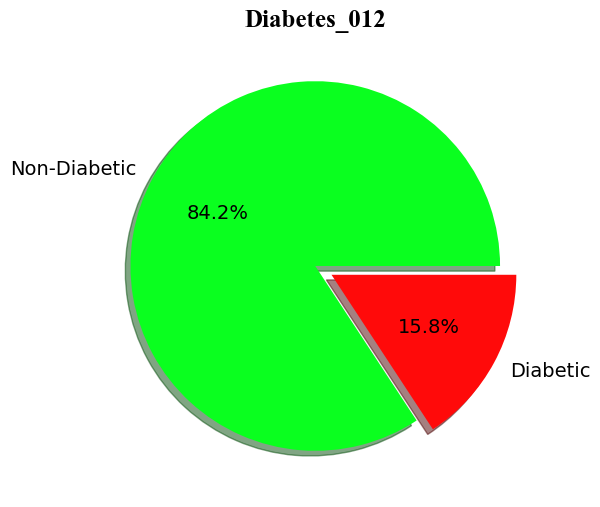

In [8]:
values =  list(df["Diabetes_012"].value_counts())
mylabels = ["Non-Diabetic", "Diabetic"]
plt.figure(figsize=(6,6))
plt.pie(values, labels = mylabels, colors= ["#0aff1f", "#ff0a0a"], autopct= "%1.1f%%",
        explode=[0,0.1],shadow= True, textprops={"size":14 , 'color':'BLACK'})
plt.title('Diabetes_012', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.show()

In [9]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))

Duplicate Rows :  23968


In [10]:
# drop the dupliaces
df.drop_duplicates(inplace = True)

In [11]:
# drop the null values
df.dropna(inplace = True)

In [12]:
# check the columns that have 95% of values are same
for column in df.select_dtypes(include=float).columns:
    print(f"********Name :  {column}*******")
    print(df[column].value_counts(normalize = True), end = "\n\n\n")

********Name :  HighBP*******
0.0    0.545622
1.0    0.454378
Name: HighBP, dtype: float64


********Name :  HighChol*******
0.0    0.558303
1.0    0.441697
Name: HighChol, dtype: float64


********Name :  CholCheck*******
1.0    0.959523
0.0    0.040477
Name: CholCheck, dtype: float64


********Name :  BMI*******
27.0    0.093783
26.0    0.077501
24.0    0.071951
28.0    0.064986
25.0    0.064446
          ...   
85.0    0.000004
91.0    0.000004
86.0    0.000004
90.0    0.000004
78.0    0.000004
Name: BMI, Length: 84, dtype: float64


********Name :  Smoker*******
0.0    0.534313
1.0    0.465687
Name: Smoker, dtype: float64


********Name :  Stroke*******
0.0    0.955235
1.0    0.044765
Name: Stroke, dtype: float64


********Name :  HeartDiseaseorAttack*******
0.0    0.896784
1.0    0.103216
Name: HeartDiseaseorAttack, dtype: float64


********Name :  PhysActivity*******
1.0    0.733283
0.0    0.266717
Name: PhysActivity, dtype: float64


********Name :  Fruits*******
1.0    0.612907

In [13]:
# drop the columns that have 90% of values are same because we want to see the effect of diabetes w.r.t other attributes
df.drop(columns = ["CholCheck", "Stroke", "HeartDiseaseorAttack", 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'], axis = 1, inplace = True)

In [14]:
# encode the target variable
df["Diabetes_012"]= df["Diabetes_012"].replace({"Non-Diabetic":0,"Diabetic":1})
df.head(2)

,Diabetes_012,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


<AxesSubplot:>

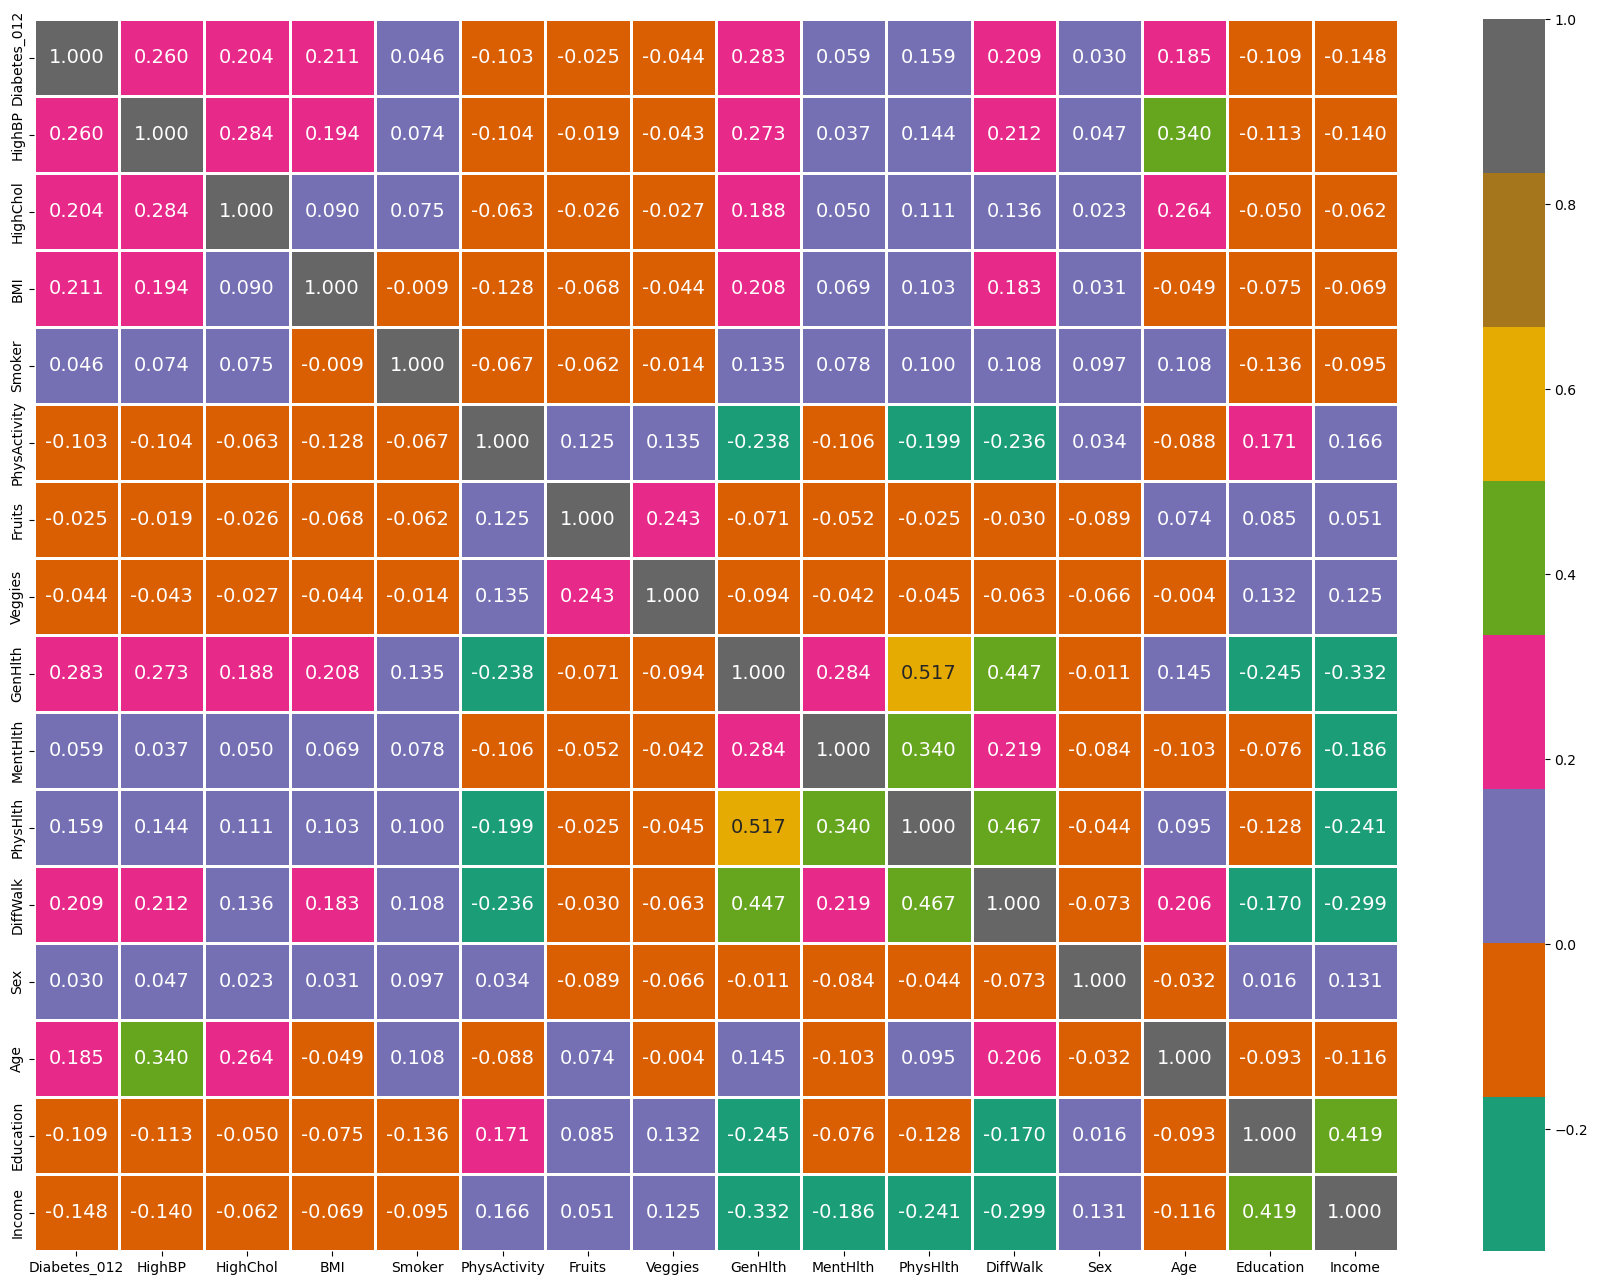

In [15]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,
            annot=True,linewidths = 1, fmt = ".3f", annot_kws= {"size": 14}, cmap = "Dark2")

In [16]:
y = df["Diabetes_012"].values
X = df.drop(['Diabetes_012'], axis=1).values

In [18]:
# balance the dataset using Adasyn
hybrid = ADASYN()
X_hybrid, y_hybrid = hybrid.fit_resample(X, y)

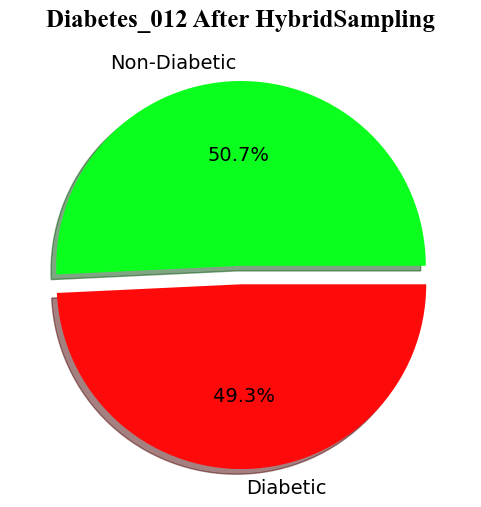

In [19]:
values =  pd.DataFrame(y_hybrid).value_counts()
mylabels = ["Non-Diabetic", "Diabetic"]
plt.figure(figsize=(6,6))
plt.pie(values, labels = mylabels, colors= ["#0aff1f", "#ff0a0a"], autopct= "%1.1f%%",
        explode=[0,0.1],shadow= True, textprops={"size":14 , 'color':'BLACK'})
plt.title('Diabetes_012 After HybridSampling', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.show()

In [20]:
X_hybrid

array([[ 1.        ,  1.        , 40.        , ...,  9.        ,
         4.        ,  3.        ],
       [ 0.        ,  0.        , 25.        , ...,  7.        ,
         6.        ,  1.        ],
       [ 1.        ,  1.        , 28.        , ...,  9.        ,
         4.        ,  8.        ],
       ...,
       [ 0.42877518,  1.        , 25.57122482, ...,  9.        ,
         6.        ,  1.42877518],
       [ 1.        ,  1.        , 25.75617666, ...,  9.        ,
         6.        ,  2.        ],
       [ 1.        ,  1.        , 25.        , ...,  9.        ,
         5.98890426,  1.98890426]])

In [21]:
# split into taining (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y_hybrid, test_size=0.3, random_state=0)

In [22]:
def build_model(model, model_name, X_test, y_test):
    # fit the model and apply  cv = 5 for scores 
#     model.fit(X_train, y_train)
    # test the model
    y_pred = model.predict(X_test)
    # accuracy score
    acc = model.score(X_test, y_test)
    dash = '-' * 120
    # print accuracy score
    print(dash)
    print(f"\t\t  The Accuracy Score : %0.3f\n" % acc)
    # print report precision, recall, f1 score, support
    print(classification_report(y_test, y_pred))
    print(dash)
    # print confusion matrix
    print(f"\t\t\tCoufusion Matrix")
    sns.heatmap(confusion_matrix(y_pred, np.array(y_test.astype(int))),fmt=".0f", annot=True,linewidths=0.2, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actually")
    plt.show()
    print(dash)
    # auc
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    # plot roc graph
    plot_roc_curve(model ,X_test, y_test)
    plt.title('ROC Curve ' + model_name)
    plt.show()
    print(dash)
    # Return the evalution matrices
    return {'Model Name': model_name,'Accuracy Score': acc,'AUC': auc_score}

In [23]:
xgb_best = XGBClassifier(n_estimators=100).fit(X_train,y_train)

------------------------------------------------------------------------------------------------------------------------
		  The Accuracy Score : 0.897

              precision    recall  f1-score   support

           0       0.85      0.96      0.91     57307
           1       0.96      0.83      0.89     55043

    accuracy                           0.90    112350
   macro avg       0.91      0.90      0.90    112350
weighted avg       0.90      0.90      0.90    112350

------------------------------------------------------------------------------------------------------------------------
			Coufusion Matrix


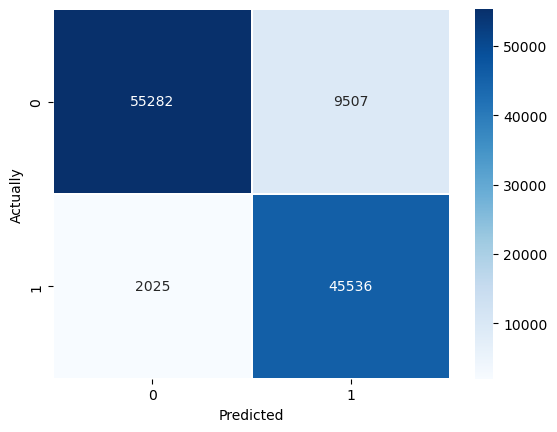

------------------------------------------------------------------------------------------------------------------------


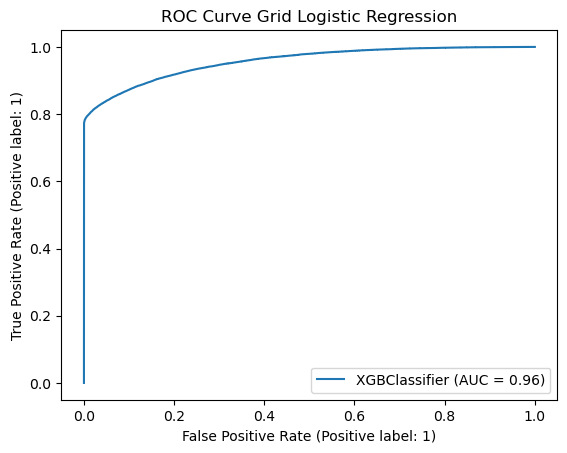

------------------------------------------------------------------------------------------------------------------------


{'Model Name': 'Grid Logistic Regression',
 'Accuracy Score': 0.8973564753004005,
 'AUC': 0.9567126135062305}

In [24]:
build_model(xgb_best, 'Grid Logistic Regression', X_test, y_test)

In [25]:
import pickle
import os

file_name=os.path.join(os.getcwd() ,"model.pkl")

pickle.dump(xgb_best,open(file_name,"wb"))